## 16-06. Agentic RAG
- RAG 를 수행하되, Agent 를 활용하여 RAG 를 수행한다면 이를 Agentic RAG
-  **문서 검색을 통해 최신 정보에 접근하여 검색 결과를 가지고 답변을 생성하는 에이전트**
- **질문에 따라 문서를 검색하여 답변하거나, 인터넷 검색 도구를 활용하여 답변하는 에이전트**
 
<br>

### 도구(Tools)
- Agent 가 활용할 도구를 정의하여 Agent 가 추론(reasoning)을 수행할 때 활용

<br>

#### 웹 검색도구: Tavily Search

In [1]:
from dotenv import load_dotenv

load_dotenv()

True

In [2]:
from langchain_community.tools.tavily_search import TavilySearchResults

In [8]:
search = TavilySearchResults(k=6)

In [9]:
search.invoke("판교 카카오 프렌즈샵 아지트점의 전화번호는 무엇인가요?")

[{'title': '[LangChain] 에이전트(Agent)와 도구(tools)를 활용한 지능형 검색 ...',
  'url': 'https://teddylee777.github.io/langchain/langchain-agent/',
  'content': "1층부터 푸릇푸릇.. 존재하지 않는 이미지입니다. 춘식이 하이 흑 넘 귀엽.. 미쳐.. 존재하지 않는 이미지입니다. 속도가 이제 감당이 안되는 29개월 아가 데리고 가보겠습니다 여름방학이 끝나기 전에 아이랑 가는 곳으로 추천해요 쾌적하고 (실내라서 안더움..굿..) 꽤 커서 시간도 훌훌 잘갑니다 껄껄 카카오프렌즈 판교아지트점 존재하지 않는 이미지입니다. 존재하지 않는 이미지입니다. 오늘 주말에 다녀왔더니, 사람이 꽤나 있었어요.'}]판교 카카오 프렌즈샵 아지트점의 전화번호는 031-601-7225입니다. 위치는 경기도 성남시 분당구 판교역로 166, 카카오판교아지트 1층에 있습니다. 운영 시간은 평일 10:00 - 21:00, 토일 12:00 - 20:00입니다. 방문하시기 전에 운영 시간이나 기타 사항을 확인하시려면 전화로 문의하시는 것이 좋습니다. > Finished chain. 답변: 판교 카카오 프렌즈샵 아지트점의 전화번호는 031-601-7225입니다. 위치는 경기도 성남시 분당구 판교역로 166, 카카오판교아지트 1층에 있습니다. 운영 시간은 평일 10:00 - 21:00, 토일 12:00 - 20:00입니다. 방문하시기 전에 운영 시간이나 기타 사항을 확인하시려면 전화로 문의하시는 것이 좋습니다. [...] 카카오 모빌리티, 카카오브레인, 카카오페이손해보험, 그라운드... m.blog.naver.com tags 검색 서재안에 글 53 neighbor ^ activity 더 궁금하신 사항은 고객센터로 문의하시면 자세히 알려드리겠습니다. 수정하신 후 다시 등록해 주세요. 회원님의 안전한 서비스 이용을 위해 비밀번호를 확인해 주세요.naver 블로그. 일상을 여행하는 중. 블로그 검색'}]판교

<br>

#### 문서 기반 문서 검색 도구: Retriever
- 데이터에 대해 조회를 수행할 retriever

In [3]:
from langchain_classic.text_splitter import RecursiveCharacterTextSplitter
from langchain_community.vectorstores import FAISS
from langchain_openai import OpenAIEmbeddings
from langchain_classic.document_loaders import PyPDFLoader

In [12]:
loader = PyPDFLoader("data/SPRI_AI_Brief_2023년12월호_F.pdf")
text_splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=100)
split_docs = loader.load_and_split(text_splitter)
vector = FAISS.from_documents(split_docs, OpenAIEmbeddings())
retriever = vector.as_retriever()

In [13]:
retriever.invoke("삼성전자가 개발한 생성형 AI 관련 내용을 문서에서 찾아줘")

[Document(id='7bfa6737-453b-403b-8382-9b5fd719c214', metadata={'producer': 'Hancom PDF 1.3.0.542', 'creator': 'Hwp 2018 10.0.0.13462', 'creationdate': '2023-12-08T13:28:38+09:00', 'author': 'dj', 'moddate': '2023-12-08T13:28:38+09:00', 'pdfversion': '1.4', 'source': 'data/SPRI_AI_Brief_2023년12월호_F.pdf', 'total_pages': 23, 'page': 12, 'page_label': '13'}, page_content='SPRi AI Brief |  \n2023-12 월호\n10삼성전자 , 자체 개발 생성 AI ‘삼성 가우스 ’ 공개\nn삼성전자가 온디바이스에서 작동 가능하며 언어, 코드, 이미지의 3개 모델로 구성된 자체 개발 생성 \nAI 모델 ‘삼성 가우스 ’를 공개\nn삼성전자는 삼성 가우스를 다양한 제품에 단계적으로 탑재할 계획으로 , 온디바이스 작동이 가능한 \n삼성 가우스는 외부로 사용자 정보가 유출될 위험이 없다는 장점을 보유KEY Contents\n£언어, 코드, 이미지의 3개 모델로 구성된 삼성 가우스 , 온디바이스 작동 지원\nn삼성전자가 2023 년 11월 8일 열린 ‘삼성 AI 포럼 2023’ 행사에서 자체 개발한 생성 AI 모델 \n‘삼성 가우스 ’를 최초 공개\n∙정규분포 이론을 정립한 천재 수학자 가우스 (Gauss) 의 이름을 본뜬 삼성 가우스는 다양한 상황에 \n최적화된 크기의 모델 선택이 가능\n∙삼성 가우스는 라이선스나 개인정보를 침해하지 않는 안전한 데이터를 통해 학습되었으며 , \n온디바이스에서 작동하도록 설계되어 외부로 사용자의 정보가 유출되지 않는 장점을 보유\n∙삼성전자는 삼성 가우스를 활용한 온디바이스 AI 기술도 소개했으며 , 생성 AI 모델을 다양한 제품에 \n단계적으로 탑재

<br>

- `create_retriever_tool` 함수로 `retriever` 를 도구로 변환

In [15]:
from langchain_classic.tools.retriever import create_retriever_tool

In [16]:
retriever_tool = create_retriever_tool(
    retriever,
    name="pdf_search",
    description="use this tool to search information from the PDF document",
)

<br>

#### Agent 가 사용할 도구 목록 정의
- `tools` 리스트는 `search`와 `retriever_tool`을 포함

In [17]:
tools = [search, retriever_tool]

<br>

#### Agent 생성
- Agent 가 활용할 LLM을 정의하고, Agent 가 참고할 Prompt 를 정의

In [18]:
from langchain_openai import ChatOpenAI
from langchain_core.prompts import ChatPromptTemplate

In [19]:
llm = ChatOpenAI(model="gpt-4o-mini", temperature=0)

In [20]:
prompt = ChatPromptTemplate.from_messages(
    [
        (
            "system",
            "You are a helpful assistant. "
            "Make sure to use the `pdf_search` tool for searching information from the PDF document. "
            "If you can't find the information from the PDF document, use the `search` tool for searching information from the web.",
        ),
        ("placeholder", "{chat_history}"),
        ("human", "{input}"),
        ("placeholder", "{agent_scratchpad}"),
    ]
)


- Tool Calling Agent 를 생성

In [23]:
from langchain_classic.agents import create_tool_calling_agent

In [24]:
agent = create_tool_calling_agent(llm, tools, prompt)

- 생성한 agent 를 실행하는 `AgentExecutor` 를 생성

In [27]:
from langchain_classic.agents import AgentExecutor

In [28]:
agent_executor = AgentExecutor(agent=agent, tools=tools, verbose=False)

<br>

### 에이전트 실행
- `agent_executor` 객체의 `invoke` 메소드는 딕셔너리 형태의 인자를 받아 처리

In [30]:
result = agent_executor.stream(
    {"input": "2024년 프로야구 플레이오프 진출한 5개 팀을 검색하여 알려주세요."}
)

In [32]:
for step in result:
    print(step)

{'actions': [ToolAgentAction(tool='tavily_search_results_json', tool_input={'query': '2024년 프로야구 플레이오프 진출 팀'}, log="\nInvoking: `tavily_search_results_json` with `{'query': '2024년 프로야구 플레이오프 진출 팀'}`\n\n\n", message_log=[AIMessageChunk(content='', additional_kwargs={'tool_calls': [{'index': 0, 'id': 'call_EWm63r8BQvtkWN5QlxVk2gJ1', 'function': {'arguments': '{"query":"2024년 프로야구 플레이오프 진출 팀"}', 'name': 'tavily_search_results_json'}, 'type': 'function'}]}, response_metadata={'finish_reason': 'tool_calls', 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_4ea526dd98', 'service_tier': 'default'}, id='lc_run--019c8991-813e-71b2-9c7f-d05c39b9eefc', tool_calls=[{'name': 'tavily_search_results_json', 'args': {'query': '2024년 프로야구 플레이오프 진출 팀'}, 'id': 'call_EWm63r8BQvtkWN5QlxVk2gJ1', 'type': 'tool_call'}], invalid_tool_calls=[], tool_call_chunks=[{'name': 'tavily_search_results_json', 'args': '{"query":"2024년 프로야구 플레이오프 진출 팀"}', 'id': 'call_EWm63r8BQvtkWN5QlxVk2gJ1', 'index': 0, '

<br>

- `agent_executor` 객체의 `invoke` 메소드를 사용하여, 질문을 입력으로 제공

In [33]:
result = agent_executor.stream(
    {"input": "삼성전자가 자체 개발한 생성형 AI 관련된 정보를 문서에서 찾아주세요."}
)

In [34]:
for step in result:
    print(step)

{'actions': [ToolAgentAction(tool='pdf_search', tool_input={'query': '삼성전자 생성형 AI'}, log="\nInvoking: `pdf_search` with `{'query': '삼성전자 생성형 AI'}`\n\n\n", message_log=[AIMessageChunk(content='', additional_kwargs={'tool_calls': [{'index': 0, 'id': 'call_v7grOY7vbVEePVYLTerZIn8W', 'function': {'arguments': '{"query":"삼성전자 생성형 AI"}', 'name': 'pdf_search'}, 'type': 'function'}]}, response_metadata={'finish_reason': 'tool_calls', 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_4ea526dd98', 'service_tier': 'default'}, id='lc_run--019c8992-6b93-77f2-ba8c-330cef7a2b9d', tool_calls=[{'name': 'pdf_search', 'args': {'query': '삼성전자 생성형 AI'}, 'id': 'call_v7grOY7vbVEePVYLTerZIn8W', 'type': 'tool_call'}], invalid_tool_calls=[], tool_call_chunks=[{'name': 'pdf_search', 'args': '{"query":"삼성전자 생성형 AI"}', 'id': 'call_v7grOY7vbVEePVYLTerZIn8W', 'index': 0, 'type': 'tool_call_chunk'}], chunk_position='last')], tool_call_id='call_v7grOY7vbVEePVYLTerZIn8W')], 'messages': [AIMessageChunk(c

<br>

### 이전 대화내용 기억하는 Agent

In [35]:
from langchain_community.chat_message_histories import ChatMessageHistory
from langchain_core.runnables.history import RunnableWithMessageHistory

In [36]:
store = {}

In [37]:
# session_id 를 기반으로 세션 기록을 가져오는 함수
def get_session_history(session_ids):
    if session_ids not in store:  # session_id 가 store에 없는 경우
        # 새로운 ChatMessageHistory 객체를 생성하여 store에 저장
        store[session_ids] = ChatMessageHistory()
    return store[session_ids]  # 해당 세션 ID에 대한 세션 기록 반환

In [38]:
agent_with_chat_history = RunnableWithMessageHistory(
    agent_executor,
    # 대화 session_id
    get_session_history,
    # 프롬프트의 질문이 입력되는 key: "input"
    input_messages_key="input",
    # 프롬프트의 메시지가 입력되는 key: "chat_history"
    history_messages_key="chat_history",
)

In [40]:
response = agent_with_chat_history.stream(
    {"input": "삼성전자가 개발한 생성형 AI 관련된 정보를 문서에서 찾아주세요."},
    # session_id 설정
    config={"configurable": {"session_id": "abc123"}},
)

for step in response:
    print(step)

{'actions': [ToolAgentAction(tool='pdf_search', tool_input={'query': '삼성전자 생성형 AI'}, log="\nInvoking: `pdf_search` with `{'query': '삼성전자 생성형 AI'}`\n\n\n", message_log=[AIMessageChunk(content='', additional_kwargs={'tool_calls': [{'index': 0, 'id': 'call_Qb14SnTiMSva2hxJTcD2Geg5', 'function': {'arguments': '{"query":"삼성전자 생성형 AI"}', 'name': 'pdf_search'}, 'type': 'function'}]}, response_metadata={'finish_reason': 'tool_calls', 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_373a14eb6f', 'service_tier': 'default'}, id='lc_run--019c8993-6197-7573-889a-ad4450dd33b2', tool_calls=[{'name': 'pdf_search', 'args': {'query': '삼성전자 생성형 AI'}, 'id': 'call_Qb14SnTiMSva2hxJTcD2Geg5', 'type': 'tool_call'}], invalid_tool_calls=[], tool_call_chunks=[{'name': 'pdf_search', 'args': '{"query":"삼성전자 생성형 AI"}', 'id': 'call_Qb14SnTiMSva2hxJTcD2Geg5', 'index': 0, 'type': 'tool_call_chunk'}], chunk_position='last')], tool_call_id='call_Qb14SnTiMSva2hxJTcD2Geg5')], 'messages': [AIMessageChunk(c

In [41]:
response = agent_with_chat_history.stream(
    {"input": "이전의 답변을 영어로 번역해 주세요."},
    # session_id 설정
    config={"configurable": {"session_id": "abc123"}},
)

for step in response:
    print(step)

{'output': "Here is the translation of the previous response into English:\n\n1. **Samsung Gauss**: On November 8, 2023, Samsung Electronics unveiled its generative AI model called 'Samsung Gauss' at the 'Samsung AI Forum 2023'. This model consists of three components: language, code, and image models, and is designed to operate on-device.\n\n2. **On-Device Operation**: Samsung Gauss has the advantage of not risking the leakage of user information externally. It has been trained on secure data and developed in a way that does not infringe on licenses or personal information.\n\n3. **Model Composition**:\n   - **Language Model**: Supports tasks such as email writing, document summarization, and translation.\n   - **Code Model**: Provides a conversational interface through the AI coding assistant 'code.i', optimized for in-house software development.\n   - **Image Model**: Capable of generating creative images and modifying existing ones, as well as enhancing low-resolution images to hig

<br>

<hr>

<br>

## 16-07. Excel 데이터 분석 Agent
- Pandas DataFrame 을 활용하여 분석을 수행하는 Agent 

<br>



In [10]:
import pandas as pd

In [11]:
df = pd.read_csv("./data/titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [12]:
from langchain_experimental.agents.agent_toolkits import create_pandas_dataframe_agent
from langchain_classic.agents.agent_types import AgentType
from langchain_openai import ChatOpenAI
import seaborn as sns

sns.set_style("white")

In [15]:
agent = create_pandas_dataframe_agent(
    ChatOpenAI(model="gpt-4o-mini", temperature=0),
    df,
    verbose=False,
    agent_type=AgentType.OPENAI_FUNCTIONS,
    allow_dangerous_code=True,
)

In [ ]:
def ask(query):
    response = agent.stream({"input": query})

    for step in response:
        print(step)

In [17]:
ask("몇 개의 행이 있어?")

{'actions': [AgentActionMessageLog(tool='python_repl_ast', tool_input={'query': 'len(df)'}, log="\nInvoking: `python_repl_ast` with `{'query': 'len(df)'}`\n\n\n", message_log=[AIMessageChunk(content='', additional_kwargs={'function_call': {'arguments': '{"query":"len(df)"}', 'name': 'python_repl_ast'}}, response_metadata={'model_provider': 'openai', 'finish_reason': 'function_call', 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_fc706eab22', 'service_tier': 'default'}, id='lc_run--019c89a3-5dcd-7531-87e3-44ca94901634', tool_calls=[], invalid_tool_calls=[], usage_metadata={'input_tokens': 528, 'output_tokens': 18, 'total_tokens': 546, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}}, tool_call_chunks=[], chunk_position='last')])], 'messages': [AIMessageChunk(content='', additional_kwargs={'function_call': {'arguments': '{"query":"len(df)"}', 'name': 'python_repl_ast'}}, response_metadata={'model_provider': 'op

{'actions': [AgentActionMessageLog(tool='python_repl_ast', tool_input={'query': "import pandas as pd\nimport matplotlib.pyplot as plt\n\n# 남자와 여자 승객의 생존율 계산\nsurvival_rate = df.groupby('Sex')['Survived'].mean()\n\n# barplot 시각화\nsurvival_rate.plot(kind='bar', color=['blue', 'pink'])\nplt.title('Survival Rate by Gender')\nplt.xlabel('Gender')\nplt.ylabel('Survival Rate')\nplt.xticks(rotation=0)\nplt.show()"}, log='\nInvoking: `python_repl_ast` with `{\'query\': "import pandas as pd\\nimport matplotlib.pyplot as plt\\n\\n# 남자와 여자 승객의 생존율 계산\\nsurvival_rate = df.groupby(\'Sex\')[\'Survived\'].mean()\\n\\n# barplot 시각화\\nsurvival_rate.plot(kind=\'bar\', color=[\'blue\', \'pink\'])\\nplt.title(\'Survival Rate by Gender\')\\nplt.xlabel(\'Gender\')\\nplt.ylabel(\'Survival Rate\')\\nplt.xticks(rotation=0)\\nplt.show()"}`\n\n\n', message_log=[AIMessageChunk(content='', additional_kwargs={'function_call': {'arguments': '{"query":"import pandas as pd\\nimport matplotlib.pyplot as plt\\n\\n# 남자와 여

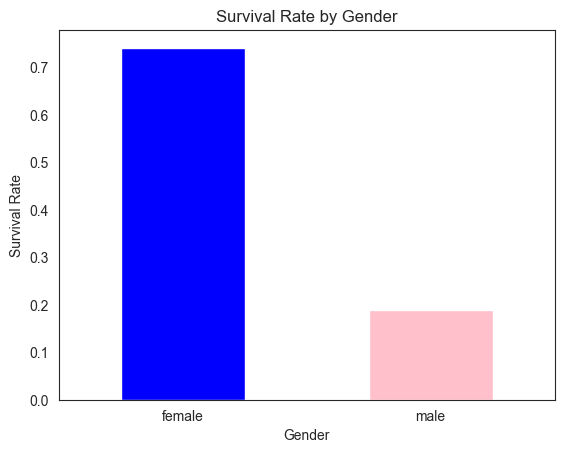

{'steps': [AgentStep(action=AgentActionMessageLog(tool='python_repl_ast', tool_input={'query': "import pandas as pd\nimport matplotlib.pyplot as plt\n\n# 남자와 여자 승객의 생존율 계산\nsurvival_rate = df.groupby('Sex')['Survived'].mean()\n\n# barplot 시각화\nsurvival_rate.plot(kind='bar', color=['blue', 'pink'])\nplt.title('Survival Rate by Gender')\nplt.xlabel('Gender')\nplt.ylabel('Survival Rate')\nplt.xticks(rotation=0)\nplt.show()"}, log='\nInvoking: `python_repl_ast` with `{\'query\': "import pandas as pd\\nimport matplotlib.pyplot as plt\\n\\n# 남자와 여자 승객의 생존율 계산\\nsurvival_rate = df.groupby(\'Sex\')[\'Survived\'].mean()\\n\\n# barplot 시각화\\nsurvival_rate.plot(kind=\'bar\', color=[\'blue\', \'pink\'])\\nplt.title(\'Survival Rate by Gender\')\\nplt.xlabel(\'Gender\')\\nplt.ylabel(\'Survival Rate\')\\nplt.xticks(rotation=0)\\nplt.show()"}`\n\n\n', message_log=[AIMessageChunk(content='', additional_kwargs={'function_call': {'arguments': '{"query":"import pandas as pd\\nimport matplotlib.pyplot as p

In [18]:
ask("남자 승객과 여자 승객의 생존율을 구한뒤 barplot 차트로 시각화 해줘")

<br>

## 16-08. Toolkits 활용 Agent
-  Toolkits 는 다양한 도구를 통합하여 제공
- https://docs.langchain.com/oss/python/integrations/tools

<br>

- 임시 폴더 `tmp` 생성

In [19]:
import os

if not os.path.exists("tmp"):
    os.mkdir("tmp")

<br>

### `FileManagementToolkit`
- 로컬 파일 관리를 위한 도구 모음

<br>

#### 파일 관리 도구
- `CopyFileTool`: 파일 복사
- `DeleteFileTool`: 파일 삭제
- `FileSearchTool`: 파일 검색
- `MoveFileTool`: 파일 이동
- `ReadFileTool`: 파일 읽기
- `WriteFileTool`: 파일 쓰기
- `ListDirectoryTool`: 디렉토리 목록 조회

<br>

#### 설정
- `root_dir`: 파일 작업의 루트 디렉토리 설정 가능
- `selected_tools`: 특정 도구만 선택적으로 사용 가능

<br>

#### 동적 도구 생성
- `get_tools` 메서드로 선택된 도구들의 인스턴스 생성


In [20]:
from langchain_community.agent_toolkits import FileManagementToolkit

- `tmp` 이름의 디렉토리를 작업 디렉토리로 설정

In [21]:
working_directory = "tmp"

- `FileManagementToolkit` 객체를 생성
  - `root_dir` 매개변수에 작업 디렉토리를 지정하여 모든 파일 작업이 이 디렉토리 내에서 이루어지도록 설정

In [22]:
toolkit = FileManagementToolkit(root_dir=str(working_directory))

- 사용 가능한 모든 파일 관리 도구 : 파일 복사, 삭제, 검색, 이동, 읽기, 쓰기, 디렉토리 목록 조회 등의 기능을 제공

In [24]:
available_tools = toolkit.get_tools()

print("[사용 가능한 파일 관리 도구들]")
for tool in available_tools:
    print(f"- {tool.name}: {tool.description}")

[사용 가능한 파일 관리 도구들]
- copy_file: Create a copy of a file in a specified location
- file_delete: Delete a file
- file_search: Recursively search for files in a subdirectory that match the regex pattern
- move_file: Move or rename a file from one location to another
- read_file: Read file from disk
- write_file: Write file to disk
- list_directory: List files and directories in a specified folder


<br>

- 도구 중 일부만 지정하여 선택

In [25]:
tools = FileManagementToolkit(
    root_dir=str(working_directory),
    selected_tools=["read_file", "file_delete", "write_file", "list_directory"],
).get_tools()
tools

[ReadFileTool(root_dir='tmp'),
 DeleteFileTool(root_dir='tmp'),
 WriteFileTool(root_dir='tmp'),
 ListDirectoryTool(root_dir='tmp')]

<br>

- 파일 생성

In [27]:
read_tool, delete_tool, write_tool, list_tool = tools

In [28]:
write_tool.invoke({"file_path": "example.txt", "text": "Hello World!"})

'File written successfully to example.txt.'

- 파일 목록 조회

In [29]:
print(list_tool.invoke({}))

0.jpg
1.jpg
10.jpg
11.jpg
12.jpg
13.jpg
14.jpg
15.jpg
16.jpg
17.jpg
18.jpg
19.jpg
2.jpg
3.jpg
4.jpg
5.jpg
6.jpg
7.jpg
8.jpg
9.jpg
example.txt


- 파일 삭제

In [30]:
print(delete_tool.invoke({"file_path": "example.txt"}))

File deleted successfully: example.txt.


<br>

### 뉴스 검색

In [31]:
from langchain.tools import tool
from typing import List, Dict
from langchain_teddynote.tools import GoogleNews

- 최신 뉴스 검색 도구를 정의

In [32]:
@tool
def latest_news(k: int = 5) -> List[Dict[str, str]]:
    """Look up latest news"""
    news_tool = GoogleNews()
    return news_tool.search_latest(k=k)

- 최신 뉴스 검색 도구를 tools 리스트에 추가

In [33]:
tools = FileManagementToolkit(
    root_dir=str(working_directory),
).get_tools()

tools.append(latest_news)

tools

[CopyFileTool(root_dir='tmp'),
 DeleteFileTool(root_dir='tmp'),
 FileSearchTool(root_dir='tmp'),
 MoveFileTool(root_dir='tmp'),
 ReadFileTool(root_dir='tmp'),
 WriteFileTool(root_dir='tmp'),
 ListDirectoryTool(root_dir='tmp'),
 StructuredTool(name='latest_news', description='Look up latest news', args_schema=<class 'langchain_core.utils.pydantic.latest_news'>, func=<function latest_news at 0x0000021185D9AC00>)]

In [37]:
from langchain_core.prompts import ChatPromptTemplate
from langchain_openai import ChatOpenAI
from langchain_classic.agents import create_tool_calling_agent, AgentExecutor
from langchain_community.chat_message_histories import ChatMessageHistory
from langchain_core.runnables.history import RunnableWithMessageHistory

In [38]:
store = {}

In [39]:
prompt = ChatPromptTemplate.from_messages(
    [
        (
            "system",
            "You are a helpful assistant. "
            "Make sure to use the `latest_news` tool to find latest news. "
            "Make sure to use the `file_management` tool to manage files. ",
        ),
        ("placeholder", "{chat_history}"),
        ("human", "{input}"),
        ("placeholder", "{agent_scratchpad}"),
    ]
)

llm = ChatOpenAI(model="gpt-4o-mini")

In [40]:
agent = create_tool_calling_agent(llm, tools, prompt)

In [41]:
agent_executor = AgentExecutor(
    agent=agent,
    tools=tools,
    verbose=False,
    handle_parsing_errors=True,
)

In [42]:
def get_session_history(session_ids):
    if session_ids not in store:  # session_id 가 store에 없는 경우
        # 새로운 ChatMessageHistory 객체를 생성하여 store에 저장
        store[session_ids] = ChatMessageHistory()
    return store[session_ids]  # 해당 세션 ID에 대한 세션 기록 반환

In [44]:
agent_with_chat_history = RunnableWithMessageHistory(
    agent_executor,
    get_session_history,
    input_messages_key="input",
    history_messages_key="chat_history",
)

In [45]:
result = agent_with_chat_history.stream(
    {
        "input": "최신 뉴스 5개를 검색하고, 각 뉴스의 제목을 파일명으로 가지는 파일을 생성하고(.txt), "
        "파일의 내용은 뉴스의 내용과 url을 추가하세요. "
    },
    config={"configurable": {"session_id": "abc123"}},
)

In [46]:
print("Agent 실행 결과:")
for step in result:
    print(step)

Agent 실행 결과:
{'actions': [ToolAgentAction(tool='latest_news', tool_input={'k': 5}, log="\nInvoking: `latest_news` with `{'k': 5}`\n\n\n", message_log=[AIMessageChunk(content='', additional_kwargs={}, response_metadata={'model_provider': 'openai', 'finish_reason': 'tool_calls', 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_bfa3527827', 'service_tier': 'default'}, id='lc_run--019c89ad-5ed0-76f1-bfb3-dcc03e55fe15', tool_calls=[{'name': 'latest_news', 'args': {'k': 5}, 'id': 'call_OxTp5eUpTqSgGmvcjyiuqX2y', 'type': 'tool_call'}], invalid_tool_calls=[], usage_metadata={'input_tokens': 412, 'output_tokens': 14, 'total_tokens': 426, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}}, tool_call_chunks=[{'name': 'latest_news', 'args': '{"k":5}', 'id': 'call_OxTp5eUpTqSgGmvcjyiuqX2y', 'index': 0, 'type': 'tool_call_chunk'}], chunk_position='last')], tool_call_id='call_OxTp5eUpTqSgGmvcjyiuqX2y')], 'messages': [AIMessageC

In [47]:
result = agent_with_chat_history.stream(
    {
        "input": "이전에 생성한 모든 파일을 `news` 폴더를 생성한 뒤 해당 폴더에 모든 파일을 복사하세요. "
        "내용도 동일하게 복사하세요. "
    },
    config={"configurable": {"session_id": "abc123"}},
)

print("Agent 실행 결과:")
for step in result:
    print(step)

Agent 실행 결과:
{'actions': [ToolAgentAction(tool='list_directory', tool_input={}, log='\nInvoking: `list_directory` with `{}`\n\n\n', message_log=[AIMessageChunk(content='', additional_kwargs={}, response_metadata={'model_provider': 'openai', 'finish_reason': 'tool_calls', 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_bfa3527827', 'service_tier': 'default'}, id='lc_run--019c89ae-4f85-77a3-b427-c7b36efe743e', tool_calls=[{'name': 'list_directory', 'args': {}, 'id': 'call_3eiE79spsJ47Lps2qjzlPbjo', 'type': 'tool_call'}], invalid_tool_calls=[], usage_metadata={'input_tokens': 687, 'output_tokens': 10, 'total_tokens': 697, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}}, tool_call_chunks=[{'name': 'list_directory', 'args': '{}', 'id': 'call_3eiE79spsJ47Lps2qjzlPbjo', 'index': 0, 'type': 'tool_call_chunk'}], chunk_position='last')], tool_call_id='call_3eiE79spsJ47Lps2qjzlPbjo')], 'messages': [AIMessageChunk(conten

In [48]:
result = agent_with_chat_history.stream(
    {"input": "news 폴더를 제외한 모든 .txt 파일을 삭제하세요."},
    config={"configurable": {"session_id": "abc123"}},
)

print("Agent 실행 결과:")
for step in result:
    print(step)

Agent 실행 결과:
{'actions': [ToolAgentAction(tool='file_delete', tool_input={'file_path': '이 대통령, 룰라 브라질 대통령과 정상회담…수교 67년 만에 “전략적 동반자 관계로 격상”.txt'}, log="\nInvoking: `file_delete` with `{'file_path': '이 대통령, 룰라 브라질 대통령과 정상회담…수교 67년 만에 “전략적 동반자 관계로 격상”.txt'}`\n\n\n", message_log=[AIMessageChunk(content='', additional_kwargs={}, response_metadata={'model_provider': 'openai', 'finish_reason': 'tool_calls', 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_bfa3527827', 'service_tier': 'default'}, id='lc_run--019c89ae-d41c-7fc0-a118-598ab020345a', tool_calls=[{'name': 'file_delete', 'args': {'file_path': '이 대통령, 룰라 브라질 대통령과 정상회담…수교 67년 만에 “전략적 동반자 관계로 격상”.txt'}, 'id': 'call_R4EzY6DOXfYjoPgJcXW7nzjB', 'type': 'tool_call'}], invalid_tool_calls=[], usage_metadata={'input_tokens': 907, 'output_tokens': 50, 'total_tokens': 957, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}}, tool_call_chunks=[{'name': 'file_delete', 'args'

<br>

<hr>